# All in One


In [68]:
# # Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import shutil
import re
import imageio
import os
import natsort
from natsort import natsorted
from datetime import datetime, date, time
import scipy.io
from scipy.io import loadmat
from decimal import Decimal


####################################################################################################

reactor = input("Reactor? ")
efficiencies = natsorted([1, 0.8, 0.6, 0.4, 0.2, 0.15, 0.10, 0.05, 0.0])
eff = natsorted(list(((np.array(efficiencies) * 100).astype(int)).astype(str)))
print(natsorted(efficiencies))
print(natsorted(eff))

#####################################################################################################

beta_directory = "./Apollo/" + reactor

print("Searching directory for .out files...")
names = []
for root, dirs, files in os.walk(beta_directory):
    for file in files:
        if file.endswith(".out"):
            #print(os.path.join(root, file))
            names.append(os.path.join(root, file))

names = natsorted(names)
names
# ##############################################################################################
# ##############################################################################################
# ############################# PLOTTING K-EFF VS BURNUP #######################################
# ##############################################################################################
# ##############################################################################################

Reactor? MSBR
[0.0, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1]
['0', '5', '10', '15', '20', '40', '60', '80', '100']
Searching directory for .out files...


['./Apollo/MSBR\\MSBR_beta_0\\MSBR_burnup.out',
 './Apollo/MSBR\\MSBR_beta_5\\MSBR_beta_5.out',
 './Apollo/MSBR\\MSBR_beta_10\\MSBR_beta_10.out',
 './Apollo/MSBR\\MSBR_beta_15\\MSBR_beta_15.out',
 './Apollo/MSBR\\MSBR_beta_20\\MSBR_beta_20.out',
 './Apollo/MSBR\\MSBR_beta_40\\MSBR_beta_40.out',
 './Apollo/MSBR\\MSBR_beta_60\\MSBR_beta_60.out',
 './Apollo/MSBR\\MSBR_beta_80\\MSBR_beta_80.out',
 './Apollo/MSBR\\MSBR_beta_100\\MSBR_beta_100.out']

./Apollo/MSBR\MSBR_beta_0\MSBR_burnup.out
There are 11 transport calculation results in eff 0.
./Apollo/MSBR\MSBR_beta_5\MSBR_beta_5.out
There are 11 transport calculation results in eff 5.
./Apollo/MSBR\MSBR_beta_10\MSBR_beta_10.out
There are 11 transport calculation results in eff 10.
./Apollo/MSBR\MSBR_beta_15\MSBR_beta_15.out
There are 11 transport calculation results in eff 15.
./Apollo/MSBR\MSBR_beta_20\MSBR_beta_20.out
There are 11 transport calculation results in eff 20.
./Apollo/MSBR\MSBR_beta_40\MSBR_beta_40.out
There are 11 transport calculation results in eff 40.
./Apollo/MSBR\MSBR_beta_60\MSBR_beta_60.out
There are 11 transport calculation results in eff 60.
./Apollo/MSBR\MSBR_beta_80\MSBR_beta_80.out
There are 11 transport calculation results in eff 80.
./Apollo/MSBR\MSBR_beta_100\MSBR_beta_100.out
There are 11 transport calculation results in eff 100.


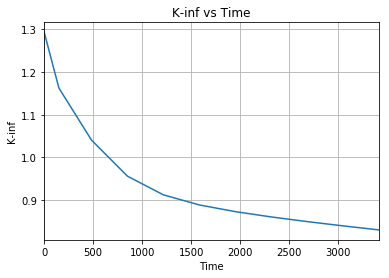

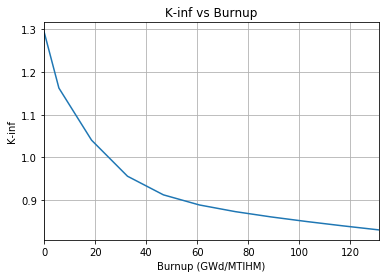

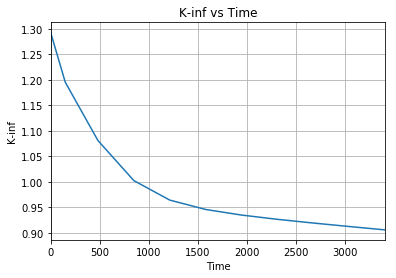

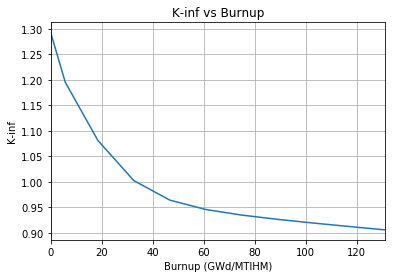

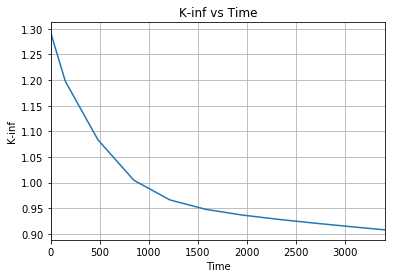

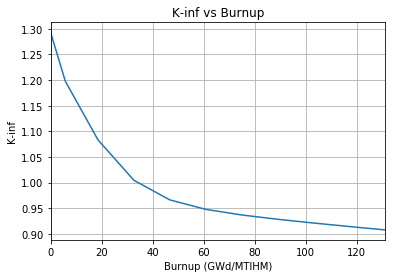

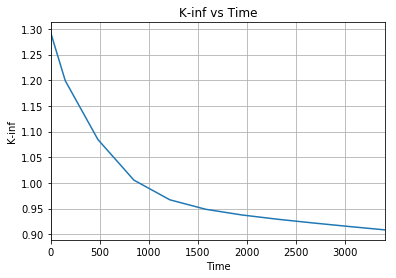

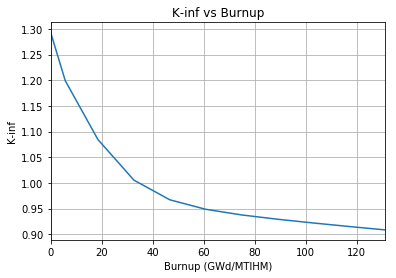

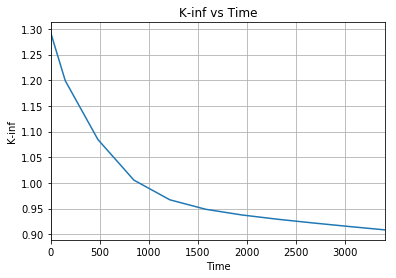

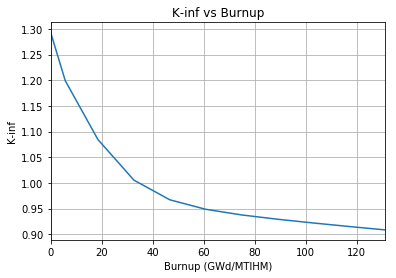

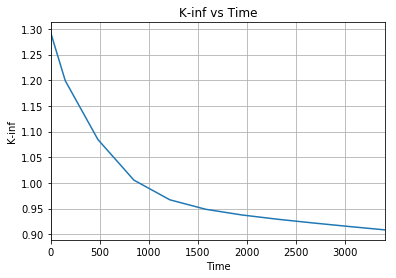

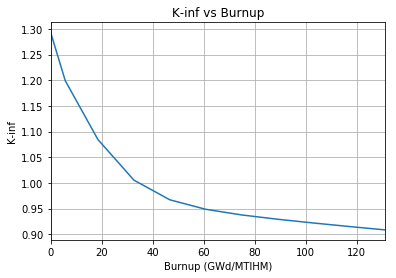

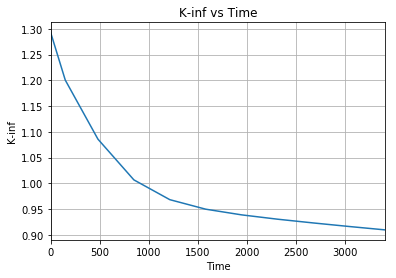

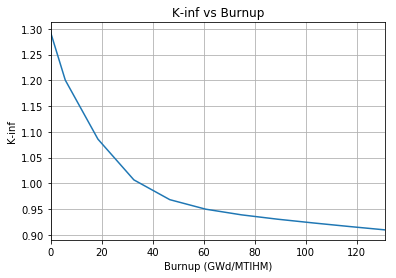

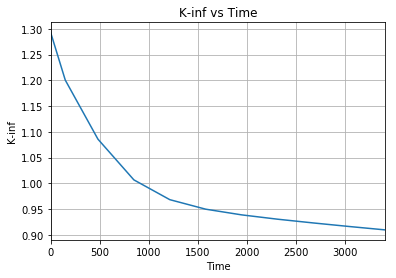

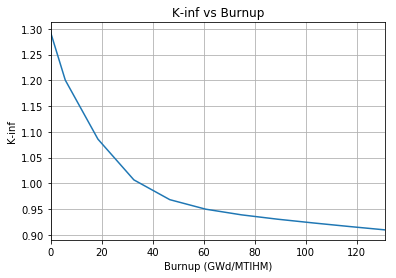

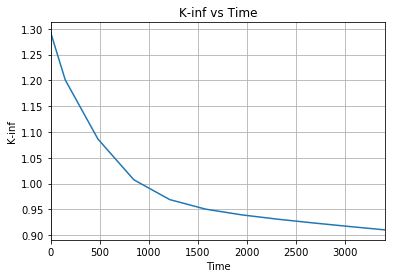

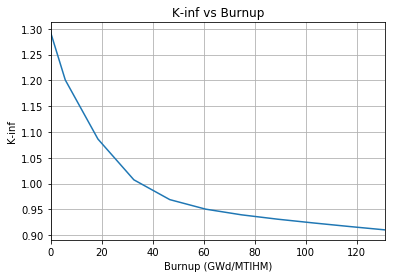

In [75]:
# Searching for Burnup Values to create dataframe to collect results
burnup = open(names[0],'r')
data = burnup.read()
x = re.findall(r', Burnup =(.*?)GWd/MTIHM, Transport k=', data, re.DOTALL)
burnup.close()

comparison = pd.DataFrame({"Burnup (GWd/MTIHM)": x}) 
comparison["Burnup (GWd/MTIHM)"] = pd.to_numeric(comparison["Burnup (GWd/MTIHM)"])

x = 0
for i in range(0, len(eff)):
#for i in range(1):
    print(names[x])
    
    # Counting number of iterations (Transport calculations)
    ocurrences_fine = open(names[x], 'r').read().count(" k-eff =       ")
    print("There are {} transport calculation results in eff {}.".format(ocurrences_fine, eff[x]))
    
    # Removes previous calculations performed by this script
    text_path = ("./" + reactor + "/K_eff/off_eff_" + eff[x] + "/")
    if os.path.exists(text_path):
        shutil.rmtree(text_path)
    os.makedirs(text_path)
    
    text_path = ("./" + reactor + "/K_eff/off_eff_" + eff[x] + "/k_eff_" + reactor + ".txt")
    if os.path.exists(text_path):
        os.remove(text_path)
        
    # Creates new text file to append k-eff values over time
    outfile_msdr = open(text_path, "a")
    with open(names[x], 'r') as f:
        textfile_temp = f.read()
        for i in range(1, ocurrences_fine + 1):
            outfile_msdr.write(textfile_temp.split(' k-eff = ')[i].split(
                "Time=")[0])
        f.close()
    outfile_msdr.close()
    
    # Creates new text file to append time values over iterations
    text_path2 = ("./" + reactor + "/K_eff/off_eff_" + eff[x] + "/k_times_" + reactor + ".txt")
    if os.path.exists(text_path2):
        os.remove(text_path2)

    outfile_msdr = open(text_path2, "a")
    
    with open(names[x], 'r') as f:
        textfile_temp = f.read()
        for i in range(1, ocurrences_fine+1):
            outfile_msdr.write(textfile_temp.split('Time=')[i].split(
                "d Nominal conditions")[0])
        f.close()
    outfile_msdr.close()
    
    # Creates new text file to append burnup values over iterations
    text_path3 = ("./" + reactor + "/K_eff/off_eff_" + eff[x] + "/k_burnups_" + reactor + ".txt")
    if os.path.exists(text_path3):
        os.remove(text_path3)

    outfile_msdr = open(text_path3, "a")
    
    with open(names[x], 'r') as f:
        textfile_temp = f.read()
        for i in range(1, ocurrences_fine+1):
            outfile_msdr.write(textfile_temp.split(', Burnup =')[i].split(
                "GWd/MTIHM")[0])
        f.close()
    outfile_msdr.close()
    
    # Reads collected values from text files into dataframes
    df_keff = pd.read_csv(text_path, header=None, delimiter=r"\s+", index_col=False)
    df_time = pd.read_csv(text_path2, header=None, delimiter=r"\s+", index_col=False)
    df_burnup = pd.read_csv(text_path3, header=None, delimiter=r"\s+", index_col=False)
    # Takes transpose of dataframes 
    df_keff = df_keff.T
    df_time = df_time.T
    df_burnup = df_burnup.T
    # Creates dataframes with time vs k-eff and burnup vs k-eff
    df_ktime = pd.concat([df_keff, df_time], axis=1, sort=False)
    df_kburn = pd.concat([df_keff, df_burnup], axis=1, sort=False)
    # Sets names for the dataframe columns
    df_ktime.columns = ['K_eff', 'Time']
    df_kburn.columns = ['K_eff', 'Burnup (GWd/MTIHM)']

    # Directory where the CSV files will be saved
    csv_path = ("./" + reactor + "/K_eff/csv/") 
    if not os.path.exists(csv_path):
        os.makedirs(csv_path)
    df_ktime.to_csv((csv_path + "k_time_" + eff[x] + ".csv"), sep=',', index=False)
    df_kburn.to_csv((csv_path + "k_burn_" + eff[x] + ".csv"), sep=',', index=False)
    
    # Merging results to the comparison dataframe
    comparison = comparison.merge(df_kburn, on='Burnup (GWd/MTIHM)')

    ax = df_ktime.plot("Time", "K_eff", title="K-inf vs Time", legend=False)
    ax.set_ylabel("K-inf")
    ax.grid()
    plt.savefig("./" + reactor + "/K_eff/K_time_off_eff_" + eff[x] + ".png", format='png', dpi=1200)

    ax = df_kburn.plot("Burnup (GWd/MTIHM)", "K_eff", title="K-inf vs Burnup", legend=False)
    ax.set_ylabel("K-inf")
    ax.grid()
    plt.savefig("./" + reactor + "/K_eff/K_burnup_off_eff_" + eff[x] + ".png", format='png', dpi=1200)
    
    x = x + 1

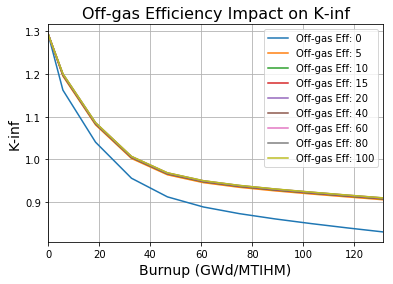

In [81]:
# Creating columns for comparison dataframe
column_list = ["Burnup (GWd/MTIHM)"]
x = 0
for i in range(0, len(eff)):
    column_name = "Off-gas Eff: {}".format(eff[x])
    column_list.append(column_name)
    x = x + 1
    
comparison.columns = column_list
plotting_columns = column_list[1:]

ax = comparison.plot(x="Burnup (GWd/MTIHM)", y=plotting_columns)
ax.grid(True)
ax.set_ylabel("K-inf", fontsize=14)
ax.set_xlabel("Burnup (GWd/MTIHM)", fontsize=14)
ax.set_title("Off-gas Efficiency Impact on K-inf", fontsize=16)
plt.savefig(("./" + reactor + "/" + "K_Comparison.png"), format='png', dpi=1200)

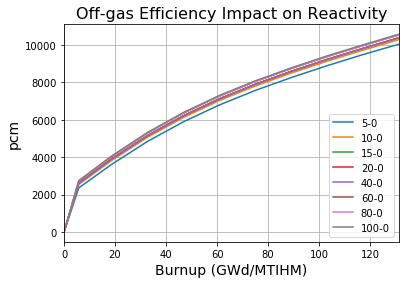

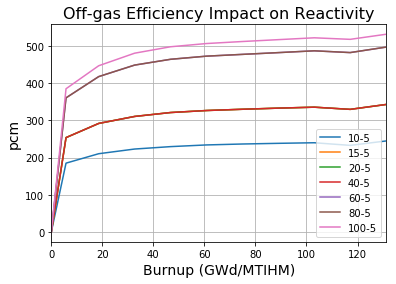

In [107]:
# Copying Dataframe to perform feature creation
testing = comparison.copy()
pcm_columns = plotting_columns

# Calculating PCM for all Efficiencies 
pcm_new = []
for i in range(0, len(eff)):
    pcm_new.append("Eff: {} pcm".format(eff[i]))

x = 0
for i in pcm_columns:
    testing[pcm_new[x]] = ((testing[i].values - 1) /testing[i].values) * (1*10**5)
    x = x + 1
    
# Calculating PCM difference relative to 0% Efficiency
pcm_new_diff = pcm_new[1:]

diff_pcm = []
for i in range(0, len(eff)):
    diff_pcm.append("{}-0".format(eff[i]))
diff_pcm = diff_pcm[1:]

x = 0
for i in pcm_new_diff:
    testing[diff_pcm[x]] = testing[i] - testing["Eff: 0 pcm"]
    x = x + 1 

# Calculating PCM difference relative to the 5% Efficiency
diff_pcm_5 = []
for i in range(0, len(eff)):
    diff_pcm_5.append("{}-5".format(eff[i]))
diff_pcm_5 = diff_pcm_5[2:]
pcm_new_no5 = pcm_new_diff[1:]

x = 0
for i in pcm_new_no5:
    testing[diff_pcm_5[x]] = testing[i] - testing["Eff: 5 pcm"]
    x = x + 1 
    
testing.to_csv("./" + reactor + "/K_eff/all_keff.csv", sep=",", index=False)
    
ax = testing.plot(x="Burnup (GWd/MTIHM)", y=diff_pcm)
ax.grid(True)
ax.set_ylabel("pcm", fontsize=14)
ax.set_xlabel("Burnup (GWd/MTIHM)", fontsize=14)
ax.set_title("Off-gas Efficiency Impact on Reactivity", fontsize=16)
plt.savefig(("./" + reactor + "/" + "pcm_0.png"), format='png', dpi=1200)

ax = testing.plot(x="Burnup (GWd/MTIHM)", y=diff_pcm_5)
ax.grid(True)
ax.set_ylabel("pcm", fontsize=14)
ax.set_xlabel("Burnup (GWd/MTIHM)", fontsize=14)
ax.set_title("Off-gas Efficiency Impact on Reactivity", fontsize=16)
plt.savefig(("./" + reactor + "/" + "pcm_5.png"), format='png', dpi=1200)

# -------------------------------- OTHER ------------------------------------------------

In [81]:
# fig, ax1 = plt.subplots(figsize=(12,8))

# color = 'tab:red'
# ax1.set_xlabel('Burnup (GWd/MTIHM)')
# ax1.set_ylabel('pcm', color=color)
# ax1.plot(testing["Burnup (GWd/MTIHM)"], testing[diff_pcm], color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(testing["Burnup (GWd/MTIHM)"], testing[diff_pcm_5], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

# fig, ax1 = plt.subplots(figsize=(12,8))

# color = 'tab:red'
# ax1.set_xlabel('Burnup (GWd/MTIHM)')
# ax1.set_ylabel('pcm', color=color)
# ax1.plot(testing["Burnup (GWd/MTIHM)"], testing[diff_pcm])
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(testing["Burnup (GWd/MTIHM)"], testing[diff_pcm_5])
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()